# Linear Regression Assignment
## Bike Sharing Assignment

#### Problem Statement

Build a multiple linear regression model for the prediction of demand for shared bikes.
Understand the factors affecting the demand for these shared bikes in the American market.
We will try to answer below questions -
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### 1. Data understanding
Read the data

In [4]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import important libraries
import numpy as np
import pandas as pd

In [8]:
bike_data = pd.read_csv("day.csv")
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
#Check number of rows and columns in the data
bike_data.shape

(730, 16)

In [12]:
#Check if any data is null
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


All columns have 730 non-nulls, so we do not have any NULL value

In [13]:
#Check the stats for numeric columns
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [15]:
#Drop unnecessary column - Instant, its just a sequence number
bike_data.drop(["instant"], axis = 1, inplace = True)

In [16]:
bike_data.shape

(730, 15)

### 2. Preparation and EDA

#### Convert Weathersit and Season to Categorical String
We will use data disctionary to convert these.

    weathersit : 
             1:Clear
             2:Mist
             3:Rain
             4:Snow

    season :
            1:spring
            2:summer
            3:fall
            4:winter            

In [28]:
bike_data["weathersit"] = bike_data["weathersit"].apply(lambda x : 'Clear' if x == 1 else 'Mist' if x == 2 else 'Rain' if x == 3 else 'Snow' )

In [29]:
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [30]:
bike_data["season"] = bike_data["season"].apply(lambda x : 'spring' if x == 1 else 'summer' if x == 2 else 'fall' if x == 3 else 'winter' )

In [33]:
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Simple Multicolinearity
As we are interested in total count, we can ignore casual and registered, as count itself is a sum of casual and registered bikers.

In [35]:
bike_data.drop(["casual","registered"], axis =1, inplace = True)

In [42]:
print(bike_data.shape)
bike_data.head()

(730, 13)


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Drop more columns
dteday information is also present in year and month. So it can be dropped too.

yr = 0 means 2018 and 1 means 2019


In [46]:
#Drop dteday
bike_data.drop(["dteday"], axis = 1, inplace = True)

In [47]:
print(bike_data.shape)
bike_data.head()

(730, 12)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


Again Temp and Atemp are similar, and bikers would go with feeling temperature
So dropping temp

In [48]:
#Drop temp
bike_data.drop(["temp"], axis = 1, inplace = True)

In [49]:
print(bike_data.shape)
bike_data.head()

(730, 11)


,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear,11.46350,43.6957,12.522300,1600


## Visualizing the data
We have come down to 11 variables from 16.
Perform Univaraite analysis. Our variable of interest is cnt - count of total rental bikes including both casual and registered

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

#### For numerical variables we can see the pariplot against cnt

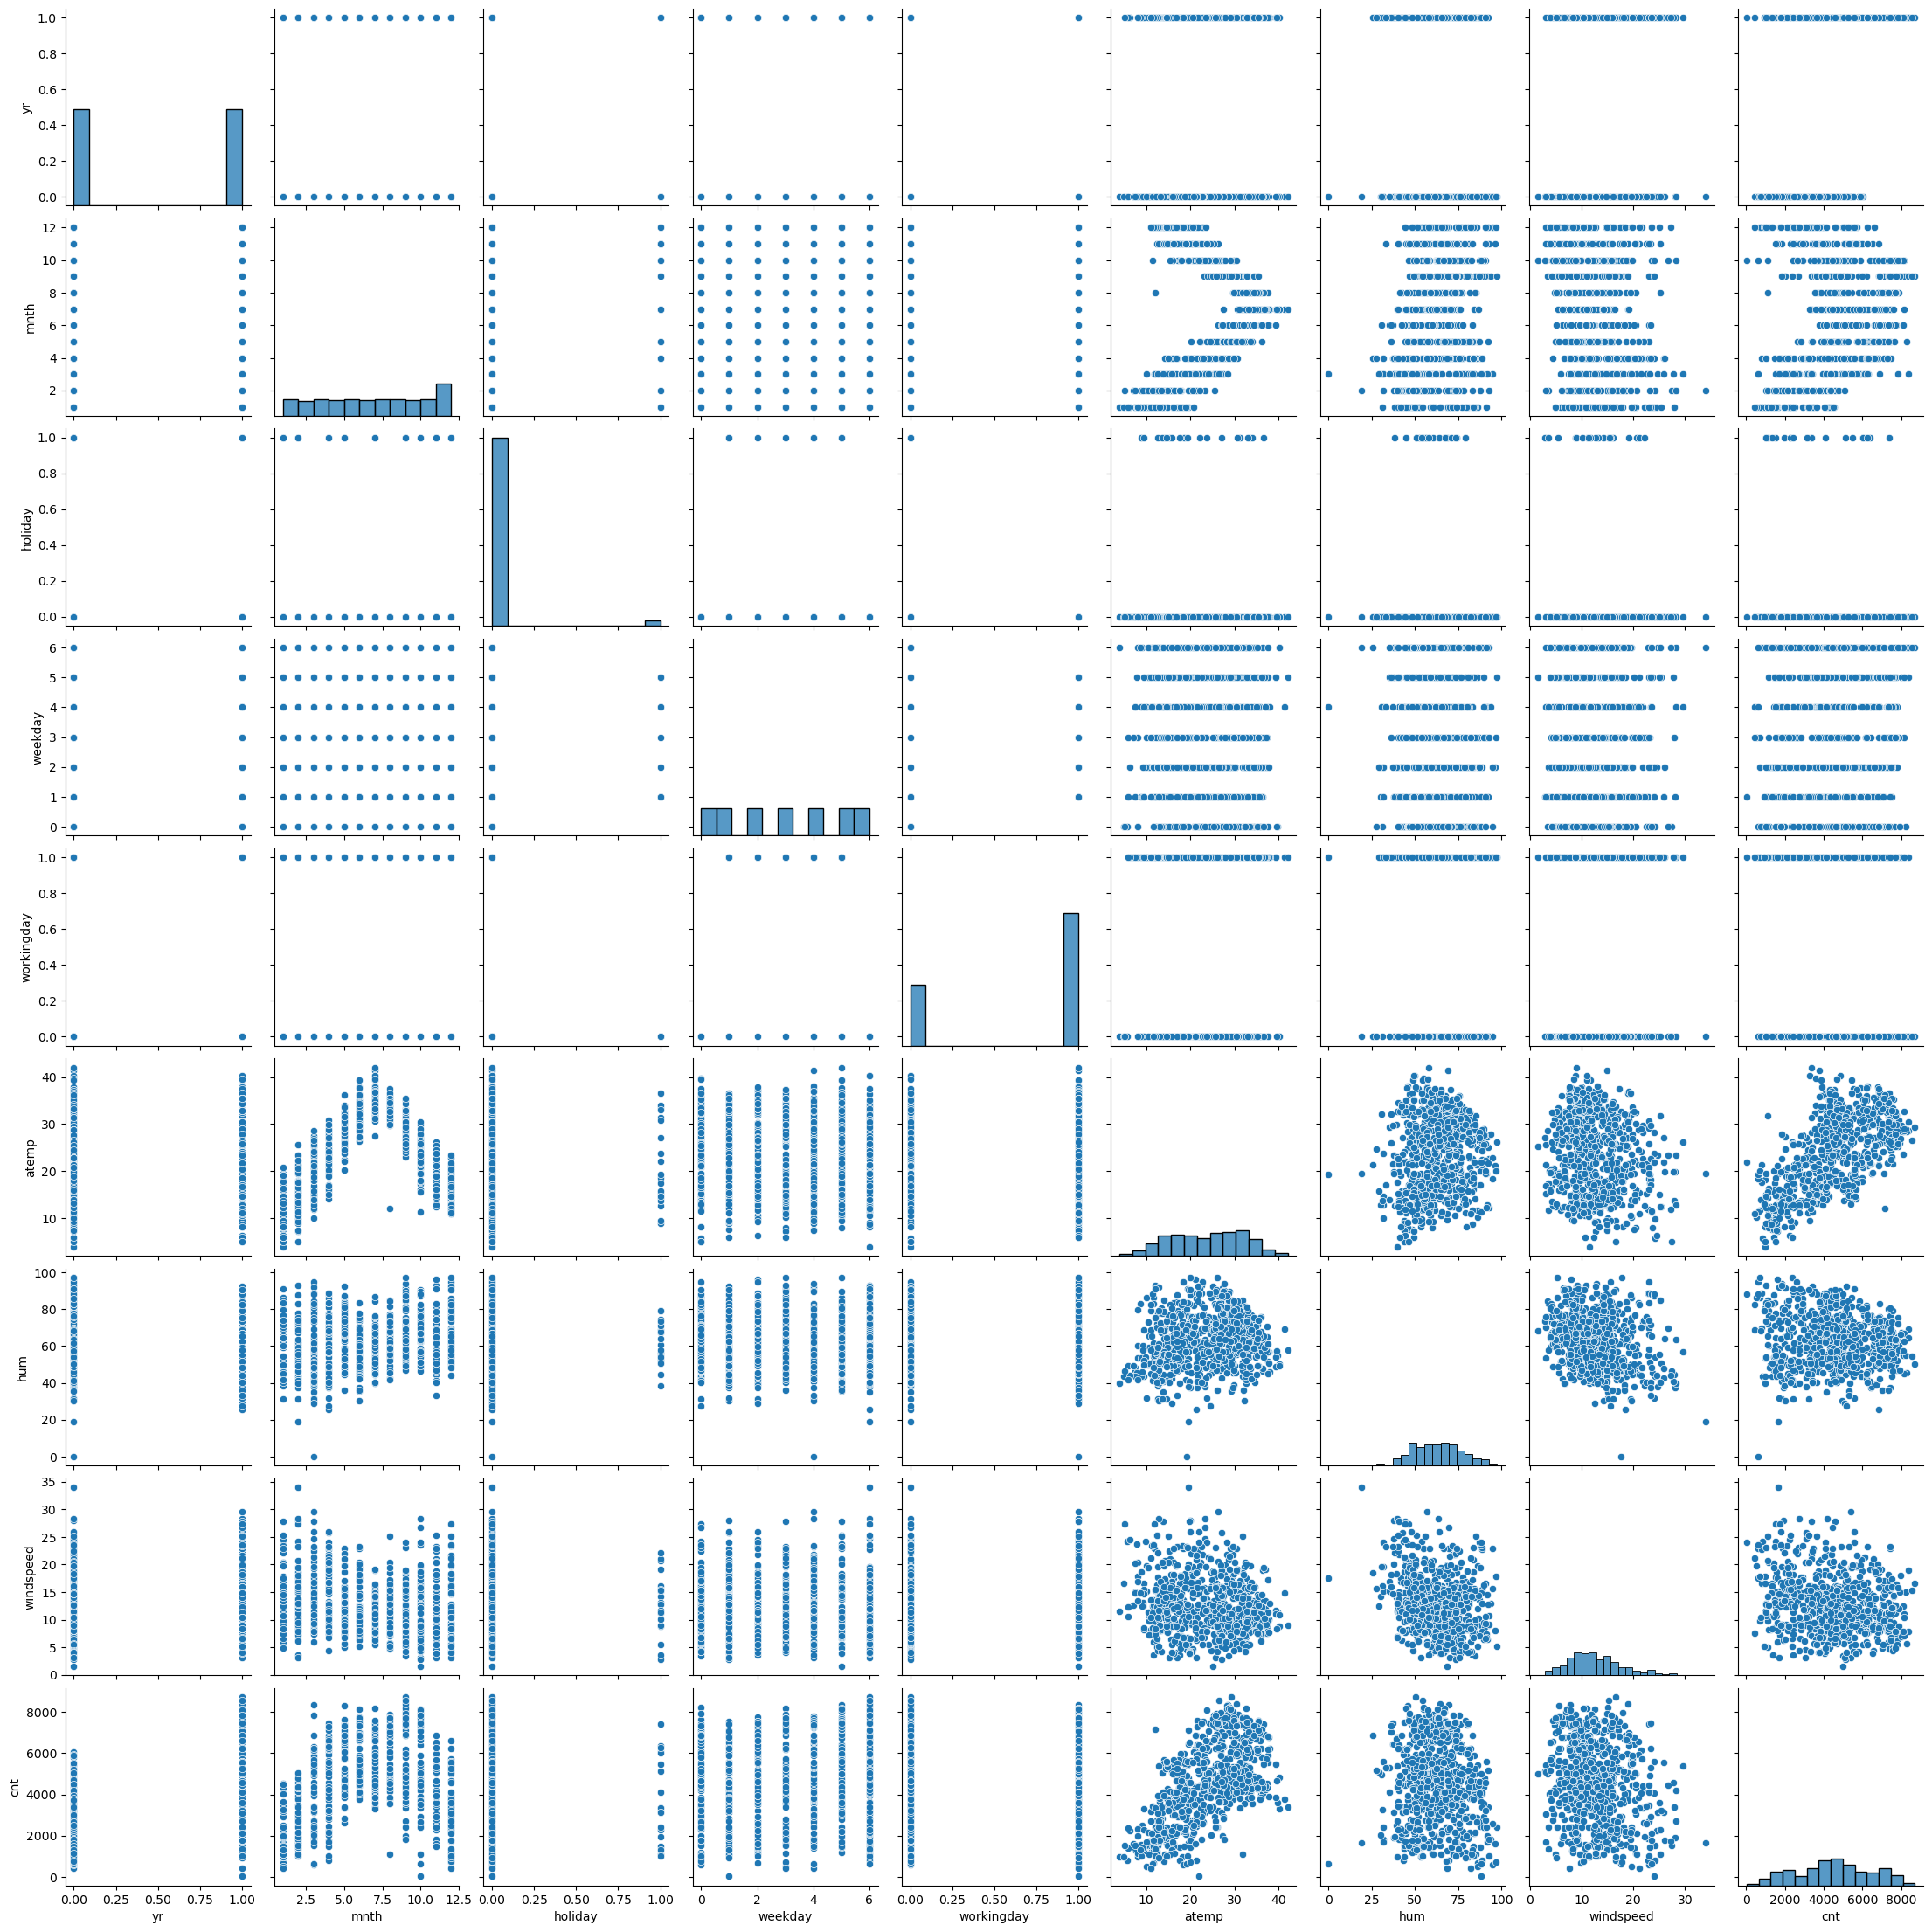

In [51]:
sns.pairplot(bike_data)
plt.show()

#### Obervations
- We can see a linear relation between feeling temperature and count of total bike rentals
There is a positive correlation between the two.
- There are more rentals in the year 2019 than 2018.
- windspeed and Humidity don't show much correlation.
- We can also notice a colinearity between month and atemp. We will check the multicolinearity 

### Visualising Categorical Variables
We will use box plot for weathersit and season.

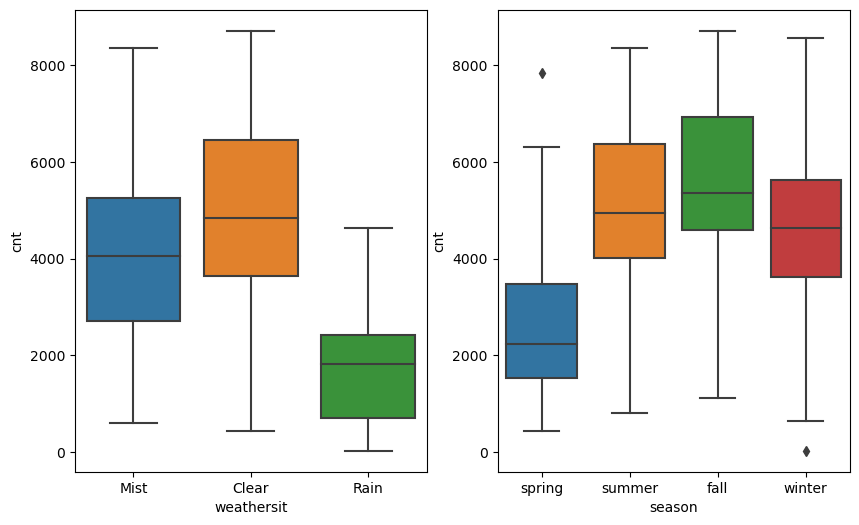

In [72]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.subplot(1,2,2)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.show()

#### Observation
- When the weather is clear there are more bike rentals, and very less during the rainy season.
- Fall seems to be the most preferred season for bike rentals followed by summer. Spring season has least bike rentals.
- We can say that clear sky during fall/summer time will be the best time for rentals.

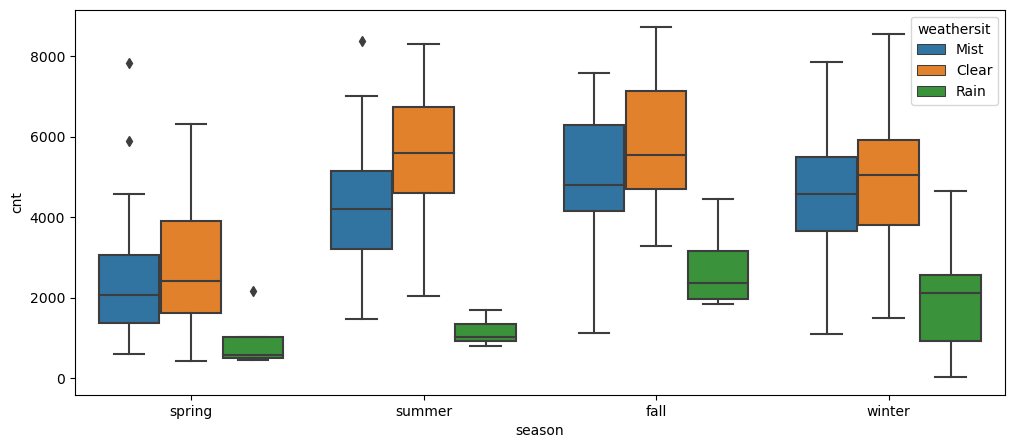

In [78]:
# Lets see for each season how the weathersit impacts the rentals

plt.figure(figsize = (12, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'weathersit', data = bike_data)
plt.show()

#### Observation
- Light Snow, Light Rain +Thunderstorm + Scattered clouds, Light Rain + Scattered clouds during Spring/Summer is the worst time for rentals.

### Dummy variables
We will convert the categorical values above to dummy variables. There will be k-1, where k i categorical levels.

In [88]:
# weathersit has 3 values - so there will be 2 dummy variables
weathersit_dummy = pd.get_dummies(bike_data['weathersit'])

In [89]:
weathersit_dummy.head()

,Clear,Mist,Rain
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


As we know that for k levels we need k-1 variables, so we can drop one column (`Clear`). Only 2 columns can identify the weathersit.
- `00` will correspond to `Clear`
- `01` will correspond to `Rain`
- `10` will correspond to `Mist`

In [90]:
# Drop first column - Clear
weathersit_dummy = pd.get_dummies(bike_data['weathersit'], drop_first = True)

In [91]:
weathersit_dummy.head()

,Mist,Rain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


#### Similarly lets do for season. 
Season has 4 values, so we will need 3 columns

In [83]:
season_dummy = pd.get_dummies(bike_data['season'])
season_dummy.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


To make it 3 columns, we can drop one column (`fall`).
- `000` will correspond to `fall`
- `001` will correspond to `winter`
- `010` will correspond to `summer`
- `100` will correspond to `spring`

In [84]:
season_dummy = pd.get_dummies(bike_data['season'], drop_first=True)
season_dummy.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [92]:
# Lets add these 5 (2+3) columns to the main dataframe
bike_data = pd.concat([bike_data, weathersit_dummy, season_dummy], axis =1)

In [93]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,Mist,Rain,spring,summer,winter
0,spring,0,1,0,6,0,Mist,18.18125,80.5833,10.749882,985,1,0,1,0,0
1,spring,0,1,0,0,0,Mist,17.68695,69.6087,16.652113,801,1,0,1,0,0
2,spring,0,1,0,1,1,Clear,9.47025,43.7273,16.636703,1349,0,0,1,0,0
3,spring,0,1,0,2,1,Clear,10.60610,59.0435,10.739832,1562,0,0,1,0,0
4,spring,0,1,0,3,1,Clear,11.46350,43.6957,12.522300,1600,0,0,1,0,0


In [94]:
#Drop the categorical columns as we created dummy columns for them
bike_data.drop(['season','weathersit'],axis=1, inplace = True)

In [126]:
print(bike_data.shape)
bike_data.head()

(730, 14)


,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,Mist,Rain,spring,summer,winter
0,0,1,0,6,0,18.18125,80.5833,10.749882,985,1,0,1,0,0
1,0,1,0,0,0,17.68695,69.6087,16.652113,801,1,0,1,0,0
2,0,1,0,1,1,9.47025,43.7273,16.636703,1349,0,0,1,0,0
3,0,1,0,2,1,10.60610,59.0435,10.739832,1562,0,0,1,0,0
4,0,1,0,3,1,11.46350,43.6957,12.522300,1600,0,0,1,0,0


In [143]:
#Moving the target column to the begining so its easy to visualize
cols = list(bike_data)
cols.insert(0, cols.pop(cols.index('cnt')))
bike_data = bike_data.loc[:, cols]

In [144]:
bike_data.head()

,cnt,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,Mist,Rain,spring,summer,winter
0,985,0,1,0,6,0,18.18125,80.5833,10.749882,1,0,1,0,0
1,801,0,1,0,0,0,17.68695,69.6087,16.652113,1,0,1,0,0
2,1349,0,1,0,1,1,9.47025,43.7273,16.636703,0,0,1,0,0
3,1562,0,1,0,2,1,10.60610,59.0435,10.739832,0,0,1,0,0
4,1600,0,1,0,3,1,11.46350,43.6957,12.522300,0,0,1,0,0


### Split the data into Training and Testing sets

In [97]:
from sklearn.model_selection import train_test_split

In [161]:
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_data, train_size = 0.7, random_state=100)

In [162]:
#Setting test_size =0.3 was resulting in one row missing from test set because of rounding of the split.
#But it was fixed if we remove test_size from above code.

print(bike_train.shape)
print(bike_test.shape)

(510, 14)
(220, 14)


### Rescaling of Features

Since we have multiple variable, the  scale of different variables need to be at same scale, else the coefficient of the variables will not be comparable.

We will use MinMax scaling, to keep the data between 0 and 1

In [120]:
from sklearn.preprocessing import MinMaxScaler

In [163]:
#Instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric varaibles that need scaling (which are not already 0 and 1s)
num_vars = ['mnth','weekday','atemp','hum','windspeed','cnt']

#Fit the scaler on data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

#### All variables are not in 0 to 1 scale

In [164]:
bike_train.head()

,cnt,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,Mist,Rain,spring,summer,winter
576,0.827658,1,0.545455,0,0.333333,1,0.766351,0.725633,0.264686,0,0,0,0,0
426,0.465255,1,0.181818,0,1.000000,0,0.438975,0.640189,0.255342,1,0,1,0,0
728,0.204096,1,1.000000,0,0.000000,0,0.200348,0.498067,0.663106,0,0,1,0,0
482,0.482973,1,0.272727,0,1.000000,0,0.391735,0.504508,0.188475,1,0,0,1,0
111,0.191095,0,0.272727,0,0.833333,1,0.318819,0.751824,0.380981,1,0,0,1,0


In [149]:
# Max values are 1 and min is 0 for all
bike_train.describe()

,cnt,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,Mist,Rain,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.513499,0.507843,0.503743,0.025490,0.498366,0.676471,0.513156,0.650480,0.320883,0.345098,0.029412,0.243137,0.247059,0.247059
std,0.224421,0.500429,0.315038,0.157763,0.336182,0.468282,0.212410,0.145846,0.169803,0.475867,0.169124,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.356420,0.000000,0.181818,0.000000,0.166667,0.000000,0.332086,0.538643,0.199179,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.518638,1.000000,0.545455,0.000000,0.500000,1.000000,0.529718,0.653714,0.296763,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.684710,1.000000,0.818182,0.000000,0.833333,1.000000,0.688457,0.754830,0.414447,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


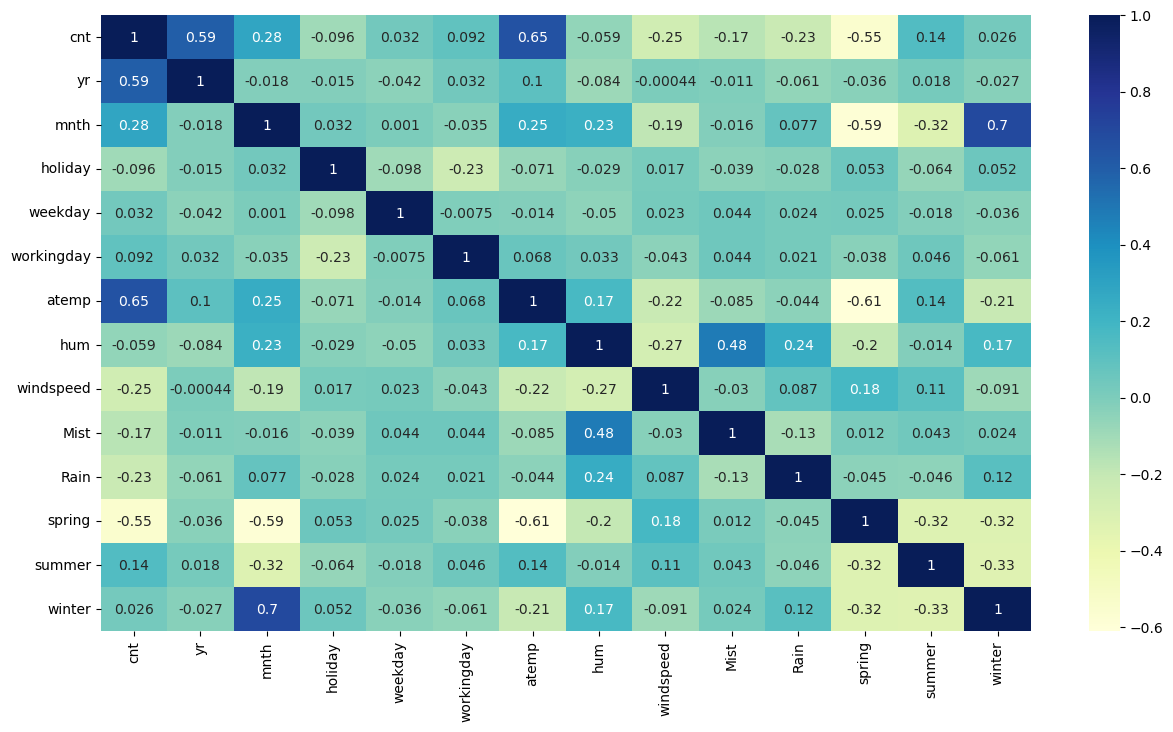

In [152]:
# Checking for correlation coefficients, to see which variables are highly correlated

plt.figure(figsize =(15,8))
sns.heatmap(bike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Observation
- `atemp`,`yr` and `spring` are very  much correlated to `cnt` , with `atemp` and `year` having a `positive` correlation and `spring` with a `negative` correlation.

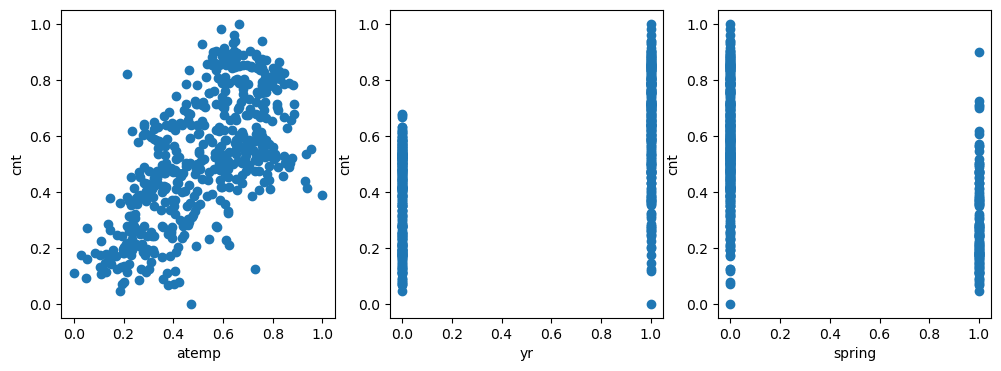

In [167]:
plt.figure(figsize=[12,4])
plt.subplot(1,3,1)
plt.scatter(bike_train.atemp, bike_train.cnt)
plt.xlabel("atemp")
plt.ylabel("cnt")
plt.subplot(1,3,2)
plt.scatter(bike_train.yr, bike_train.cnt)
plt.xlabel("yr")
plt.ylabel("cnt")
plt.subplot(1,3,3)
plt.scatter(bike_train.spring, bike_train.cnt)
plt.xlabel("spring")
plt.ylabel("cnt")
plt.show()

### 3. Data Modelling

Create X and Y trains. y_train will have the target variable and X_train, remaining variables.

In [168]:
y_train = bike_train.pop('cnt')
X_train = bike_train

In [169]:
X_train.head()

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,Mist,Rain,spring,summer,winter
576,1,0.545455,0,0.333333,1,0.766351,0.725633,0.264686,0,0,0,0,0
426,1,0.181818,0,1.000000,0,0.438975,0.640189,0.255342,1,0,1,0,0
728,1,1.000000,0,0.000000,0,0.200348,0.498067,0.663106,0,0,1,0,0
482,1,0.272727,0,1.000000,0,0.391735,0.504508,0.188475,1,0,0,1,0
111,0,0.272727,0,0.833333,1,0.318819,0.751824,0.380981,1,0,0,1,0


In [170]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

We will add one variable at a time and see the correlation, and keep on adding more varaible and see if that makes our model better.

In [171]:
import statsmodels.api as sm

In [180]:
# Lets start with atemp
# first add a constant

X_train_lm = sm.add_constant(X_train[['atemp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [182]:
lr.params

const    0.162201
atemp    0.684584
dtype: float64

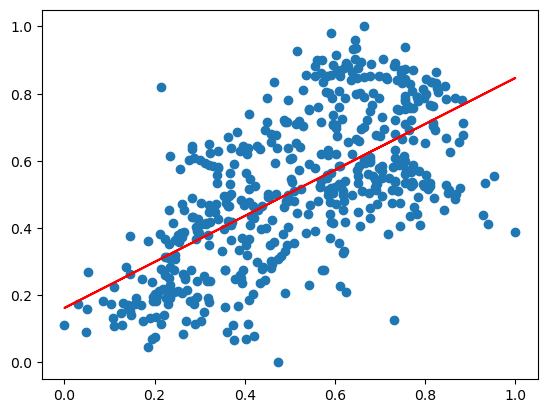

In [185]:
# Visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.162201 + 0.684584*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [184]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     367.6
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           4.77e-62
Time:                        23:50:11   Log-Likelihood:                 177.73
No. Observations:                 510   AIC:                            -351.5
Df Residuals:                     508   BIC:                            -343.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1622      0.020      8.181      0.0

#### Observation

- Coefficient for atemp is 0.6846, showing a high correlation.
- Significance (P value) is 0, so the result is statistically significant
- R-squared is 0.420 which means that the 42% of the variance in bike rantals is explained by atemp.


In [189]:
# adding more variables  - yr
X_train_lm = X_train[['atemp','yr']]
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(y_train,X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     582.7
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          3.98e-132
Time:                        23:54:52   Log-Likelihood:                 343.25
No. Observations:                 510   AIC:                            -680.5
Df Residuals:                     507   BIC:                            -667.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0718      0.015      4.802      0.0

#### Observation
On adding year to feel temperature, the R-squared value has increased to 0.697, whcih means about 70% or variance in count is explained by year and atemp.

Since there are more variables, instead of adding one by one, we will add all variables and remove the insignificant ones

In [190]:
bike_data.columns

Index(['cnt', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'atemp', 'hum',
       'windspeed', 'Mist', 'Rain', 'spring', 'summer', 'winter'],
      dtype='object')

In [191]:
X_train_lm = sm.add_constant(X_train)

In [192]:
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.params

const         0.256916
yr            0.233527
mnth          0.015385
holiday      -0.060513
weekday       0.050354
workingday    0.019009
atemp         0.491573
hum          -0.126086
windspeed    -0.162249
Mist         -0.057538
Rain         -0.243523
spring       -0.089223
summer        0.034048
winter        0.064569
dtype: float64

In [193]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     186.4
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          2.60e-181
Time:                        00:24:01   Log-Likelihood:                 490.83
No. Observations:                 510   AIC:                            -953.7
Df Residuals:                     496   BIC:                            -894.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2569      0.039      6.655      0.0

In [195]:
# We will look into VIF (Variation Inflation Factor) , P value to decided which variables to drop.
#First we will calcualte the VIF (1/(1-Rsquared of features))

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [196]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,hum,29.86
5,atemp,16.29
1,mnth,12.44
7,windspeed,4.69
10,spring,4.23
12,winter,4.21
4,workingday,3.19
3,weekday,3.15
11,summer,2.57
8,Mist,2.31


#### A high value of VIF means a high correlation of a variable with other variables

Here we have `hum`, `atemp` and `mnth` with high VIF (more than 5)
Also if we look a the P value from liner model summary stats, `mnth` has a high p-value - 0.555 (more than 0.05)


In [203]:
# As mnth has high VIF and p-Value, lets drop and create another model and see the stats again
X = X_train.drop('mnth',axis =1)

In [204]:
# Create another model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [205]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     202.1
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          2.13e-182
Time:                        00:46:39   Log-Likelihood:                 490.65
No. Observations:                 510   AIC:                            -955.3
Df Residuals:                     497   BIC:                            -900.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2642      0.037      7.228      0.0

In [206]:
#Check VIF post dropping one variable
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,hum,27.00
4,atemp,15.23
6,windspeed,4.56
9,spring,3.67
3,workingday,3.19
2,weekday,3.09
11,winter,2.90
7,Mist,2.28
10,summer,2.20
0,yr,2.07


In [207]:
# We dont have any variable with more tha 0.05 p-Value, but still we have high VIF
# Lets remove hum
X = X.drop('hum',axis =1)

In [209]:
# Create another model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [210]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     215.7
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          2.00e-181
Time:                        00:47:32   Log-Likelihood:                 485.55
No. Observations:                 510   AIC:                            -947.1
Df Residuals:                     498   BIC:                            -896.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1991      0.031      6.527      0.0

In [212]:
#Check VIF post dropping one variable
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,atemp,5.17
5,windspeed,4.54
3,workingday,3.15
2,weekday,3.08
8,spring,2.23
0,yr,2.06
9,summer,1.86
10,winter,1.73
6,Mist,1.55
1,holiday,1.09


#### Observation

- VIF for atemp reduced significantly after dropping `hum`
- `atemp` has VIF of 5.17, and p-Value is 0. Its correlation coefficiant is also high, so we will keep it.
- The p-Value of summer is 0.052 but has a low VIF. We can try dropping this too

In [213]:
X = X.drop('summer',axis =1)
# Create another model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     235.5
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          8.34e-182
Time:                        00:53:40   Log-Likelihood:                 483.62
No. Observations:                 510   AIC:                            -945.2
Df Residuals:                     499   BIC:                            -898.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2301      0.026      8.826      0.0

In [214]:
#Check VIF post dropping one variable
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,atemp,5.17
5,windspeed,3.96
3,workingday,3.08
2,weekday,3.05
0,yr,2.05
8,spring,1.82
6,Mist,1.53
9,winter,1.42
1,holiday,1.09
7,Rain,1.08


There is a slight reduction in R-squared value but now we dont have any variable with more p-Value or VIF.
So this model should be good.

In [233]:
#Just to check what changes if we drop atemp considering its more than 5
X_check = X.drop('atemp',axis =1)
# Create another model
X_check_train_lm = sm.add_constant(X_check)

lr_5 = sm.OLS(y_train, X_check_train_lm).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     171.2
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          1.59e-146
Time:                        01:49:47   Log-Likelihood:                 397.57
No. Observations:                 510   AIC:                            -775.1
Df Residuals:                     500   BIC:                            -732.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5361      0.017     31.092      0.0

We can see there is a significant decrease in R-sequared value. So we will not drop atemp.

### 4. Residual Analysis

In [215]:
#Predict value of y from the models
y_train_cnt = lr_4.predict(X_train_lm)

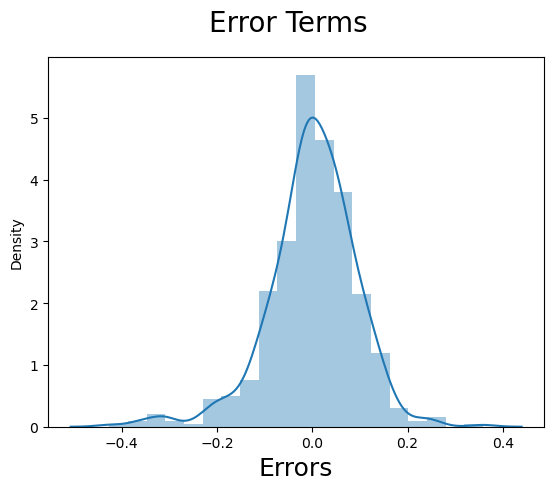

In [216]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)  # Residual is y train - y_train_pred
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

The distribution of error terms is normall and centered around 0. So we can go ahead with the model and start making prediction on test set and evaluating it.

### 5. Making Predictions

First lets do same preprocessing on test set as we did on train set

In [218]:
# Scale test dataset

num_vars = ['mnth','weekday','atemp','hum','windspeed','cnt']

#Fit the scaler on data
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,cnt,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,Mist,Rain,spring,summer,winter
184,0.692706,0,0.545455,1,0.166667,0,0.769660,0.657364,0.084219,1,0,0,0,0
535,0.712034,1,0.454545,0,0.500000,1,0.842587,0.610133,0.153728,0,0,0,1,0
299,0.303382,0,0.818182,0,0.666667,1,0.496145,0.837699,0.334206,1,0,0,0,1
221,0.547400,0,0.636364,0,0.500000,1,0.795343,0.437098,0.339570,0,0,0,0,0
152,0.569029,0,0.454545,0,0.666667,1,0.741471,0.314298,0.537414,0,0,0,1,0


In [219]:
bike_test.describe()

,cnt,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,Mist,Rain,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.522154,0.481818,0.499174,0.036364,0.502273,0.700000,0.532847,0.638221,0.313293,0.318182,0.027273,0.254545,0.263636,0.236364
std,0.219163,0.500809,0.311120,0.187620,0.330843,0.459303,0.217401,0.148694,0.159584,0.466833,0.163248,0.436599,0.441609,0.425817
min,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.378595,0.000000,0.272727,0.000000,0.166667,0.000000,0.344870,0.529197,0.198843,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.524678,0.000000,0.454545,0.000000,0.500000,1.000000,0.544652,0.625590,0.300126,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.677750,1.000000,0.727273,0.000000,0.833333,1.000000,0.713308,0.743798,0.402718,1.000000,0.000000,1.000000,1.000000,0.000000
max,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000


The min max values are from the training set so we can see they are not exactly o and 1

#### Derive X_test and y_test

In [220]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [221]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)
X_test_lm.head()

,const,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,Mist,Rain,spring,summer,winter
184,1.0,0,0.545455,1,0.166667,0,0.769660,0.657364,0.084219,1,0,0,0,0
535,1.0,1,0.454545,0,0.500000,1,0.842587,0.610133,0.153728,0,0,0,1,0
299,1.0,0,0.818182,0,0.666667,1,0.496145,0.837699,0.334206,1,0,0,0,1
221,1.0,0,0.636364,0,0.500000,1,0.795343,0.437098,0.339570,0,0,0,0,0
152,1.0,0,0.454545,0,0.666667,1,0.741471,0.314298,0.537414,0,0,0,1,0


In [222]:
# Creating X_test_lm dataframe by dropping variables from X_test_lm as per final X_train_lm

X_test_lm = X_test_lm.drop(["hum", "summer", "mnth"], axis = 1)

In [223]:
X_test_lm.describe()

,const,yr,holiday,weekday,workingday,atemp,windspeed,Mist,Rain,spring,winter
count,220.0,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,1.0,0.481818,0.036364,0.502273,0.700000,0.532847,0.313293,0.318182,0.027273,0.254545,0.236364
std,0.0,0.500809,0.187620,0.330843,0.459303,0.217401,0.159584,0.466833,0.163248,0.436599,0.425817
min,1.0,0.000000,0.000000,0.000000,0.000000,0.025950,-0.042808,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.166667,0.000000,0.344870,0.198843,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.000000,0.000000,0.500000,1.000000,0.544652,0.300126,0.000000,0.000000,0.000000,0.000000
75%,1.0,1.000000,0.000000,0.833333,1.000000,0.713308,0.402718,1.000000,0.000000,1.000000,0.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,0.980934,0.807474,1.000000,1.000000,1.000000,1.000000


In [224]:
# Making predictions using the final model

y_test_pred = lr_4.predict(X_test_lm)

### 6. Model Evaluation
Evaludate the model by calculating R2 score

In [227]:
from sklearn.metrics import r2_score

r2_score(y_true=y_test,y_pred=y_test_pred)

0.8077347200562922

The R2 score on test set is 0.81 and it was 0.825, which is pretty reasonable. So our Model is able to generalize the leanings from training set on test set.

So we can say that the `atemp` and `yr` impact the bike rentals the most as their correlation coefficients are high as per the model summary.

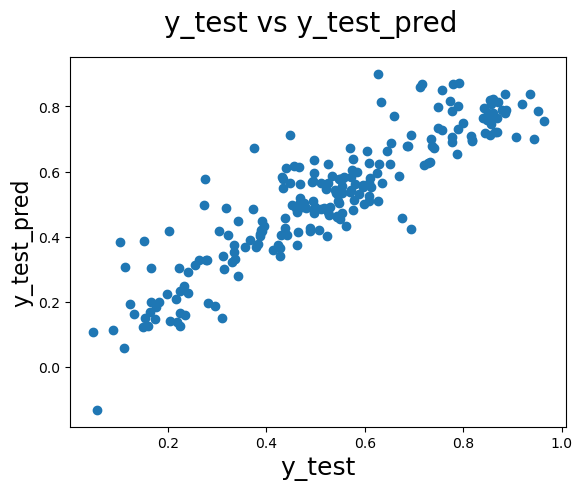

In [230]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16) 
plt.show()

The linear euqation for our model will be -

`cnt` = 0.2301 + 0.2368*`yr` - 0.0616*`holiday` + 0.0534*`weekday` + 0.0194*`workingday` + 0.4349*`atemp` - 0.1318*`windspeed` - 0.0776*`Mist` - 0.2813*`Rain` + 0.0396*`winter`